## I. Import Libraries, Preferences, and Helper Functions

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_URL = "https://gitlab.com/aelluminate/databank/-/raw/main/2024-10/breast-cancer-cells/cell-samples.csv"

## II. Exploratory Data Analysis (EDA)

### Load the data

In [4]:
cells = pd.read_csv(DATASET_URL)

# Preview the first 5 rows of the dataset
cells.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Preview the last 5 rows of the dataset
cells.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


### Data overview

In [6]:
cells.shape

(699, 11)

In [7]:
cells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
cells.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### How many classes are there?

In [9]:
cells['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

## III. Data Preprocessing

### Data Cleaning

- Drop duplicates and missing values

In [30]:
cells.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
Size           0
dtype: int64

In [37]:
print(f"Number of duplicated records: {cells.duplicated().sum()}")

Number of duplicated records: 8


### Separation of the two (2) Classes

In [11]:
benign = cells[cells['Class'] == 2]
maligant = cells[cells['Class'] == 4]

# Preview the first 5 rows of the benign dataset
benign.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
# Preview the first 5 rows of the maligant dataset
maligant.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
5,1017122,8,10,10,8,7,10,9,7,1,4
12,1041801,5,3,3,3,2,3,4,4,1,4
14,1044572,8,7,5,10,7,9,5,5,4,4
15,1047630,7,4,6,4,6,1,4,3,1,4
18,1050670,10,7,7,6,4,10,4,1,2,4


### Distribution of the Classes

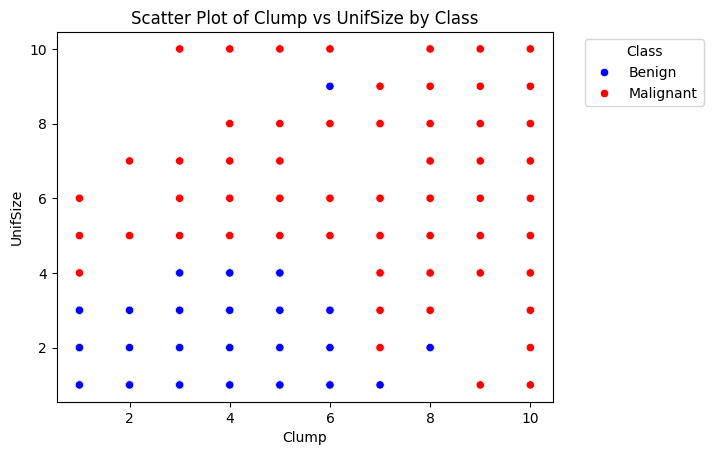

In [23]:
# Create a scatter plot of Clump vs UnifSize by Class
scatter_plot = sns.scatterplot(data=cells, x='Clump', y='UnifSize', hue='Class', palette={2: 'blue', 4: 'red'})
plt.title('Scatter Plot of Clump vs UnifSize by Class')
plt.xlabel('Clump')
plt.ylabel('UnifSize')

# Get the handles and labels of the scatter plot
handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles=handles, labels=['Benign', 'Malignant'], title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the scatter plot
plt.show()

### Type Conversion

Converting numerical features stored as objects to numerical data types.

In [29]:
# Replace non-numeric values with NaN
cells['BareNuc'] = pd.to_numeric(cells['BareNuc'], errors='coerce')

# Drop rows with NaN values in 'BareNuc'
cells = cells.dropna(subset=['BareNuc'])

# Convert 'BareNuc' to integer
cells['BareNuc'] = cells['BareNuc'].astype('int')

cells.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
 11  Size         683 non-null    int64
dtypes: int64(12)
memory usage: 69.4 KB


## IV. Save the Preprocessed Data

Save the new dataset that has been preprocessed so we can use to train a Support Vector Machine (SVM) model.

In [39]:
directory = "../datasets"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the path to save the preprocessed dataset
filepath = os.path.join(directory, "preprocessed.csv")

# Save the preprocessed dataset to a CSV file
cells.to_csv(filepath, index=False)

# Display if the dataset has been saved
if os.path.exists(filepath):
    print(f"Dataset has been saved to {filepath}")

Dataset has been saved to ../datasets\preprocessed.csv


In [40]:
# Load the preprocessed dataset
preprocessed = pd.read_csv(filepath)

# Display the first 5 rows of the preprocessed dataset
preprocessed.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class,Size
0,1000025,5,1,1,1,2,1,3,1,1,2,458
1,1002945,5,4,4,5,7,10,3,2,1,2,458
2,1015425,3,1,1,1,2,2,3,1,1,2,458
3,1016277,6,8,8,1,3,4,3,7,1,2,458
4,1017023,4,1,1,3,2,1,3,1,1,2,458
